## Assignment: predicting house prices

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

* Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

```python
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
```

* Please follow the example above and call `engine.dispose()` when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
* Investigate the data, and do any necessary data cleaning.
* Explore the data and find some variables that you think would be useful in predicting house prices.
* Build your initial model using these features and estimate the parameters using OLS.


Spend up to 4 hours on this assignment. When you are done and have submitted a link to your notebook below, feel free to take a look at [this example solution](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/2.solution_simple_linear_regression_models.ipynb).



In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprice_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houseprice_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
%matplotlib inline

In [4]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
houseprice_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [6]:
(houseprice_df.isnull().sum()*100/houseprice_df.isnull().count()).sort_values(ascending=False)

poolqc           99.520548
miscfeature      96.301370
alley            93.767123
fence            80.753425
fireplacequ      47.260274
lotfrontage      17.739726
garagecond        5.547945
garagetype        5.547945
garageyrblt       5.547945
garagefinish      5.547945
garagequal        5.547945
bsmtexposure      2.602740
bsmtfintype2      2.602740
bsmtfintype1      2.534247
bsmtcond          2.534247
bsmtqual          2.534247
masvnrarea        0.547945
masvnrtype        0.547945
electrical        0.068493
utilities         0.000000
yearremodadd      0.000000
mssubclass        0.000000
foundation        0.000000
extercond         0.000000
exterqual         0.000000
exterior2nd       0.000000
exterior1st       0.000000
roofmatl          0.000000
roofstyle         0.000000
yearbuilt         0.000000
                   ...    
garagearea        0.000000
paveddrive        0.000000
wooddecksf        0.000000
openporchsf       0.000000
threessnporch     0.000000
bsmtunfsf         0.000000
s

__We have missing values in 19 variables. we exclude those in this analysis because we have 60 variables that represent characteristic for housing.__

In [7]:
houseprice_df = houseprice_df.drop(columns=['poolqc','miscfeature','alley','fence','fireplacequ','lotfrontage','garagecond','garagetype','garageyrblt','garagefinish','garagequal','bsmtexposure','bsmtfintype2','bsmtfintype1','bsmtcond','bsmtqual','masvnrarea','masvnrtype','electrical']
)

# EDA and Feature Engineering

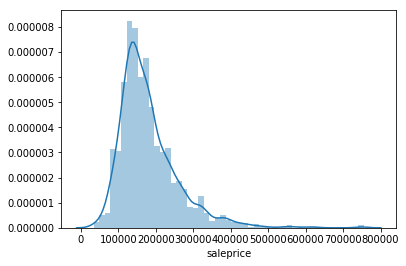

In [8]:
sns.distplot(houseprice_df['saleprice'])
plt.show()

In [9]:
numerical_columList = houseprice_df.select_dtypes(exclude = ['object']).columns
nonNumerical_columList = houseprice_df.select_dtypes(['object']).columns

In [10]:
numerical_columList = numerical_columList.drop('id')

In [11]:
houseprice_df[numerical_columList].corr()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
mssubclass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotarea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
bsmtfinsf1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
bsmtfinsf2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
bsmtunfsf,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
totalbsmtsf,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


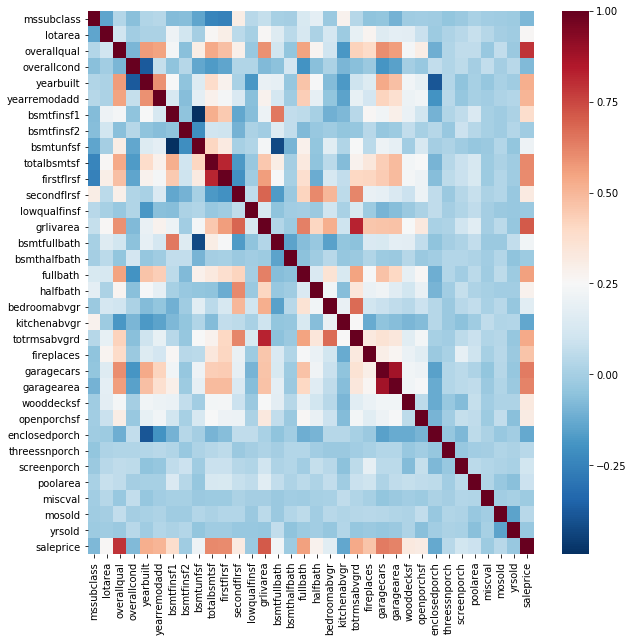

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(houseprice_df[numerical_columList].corr(), cmap="RdBu_r")
plt.show()

In [13]:
np.abs(houseprice_df[numerical_columList].corr()['saleprice'].sort_values(ascending=False)).head(10)

saleprice       1.000000
overallqual     0.790982
grlivarea       0.708624
garagecars      0.640409
garagearea      0.623431
totalbsmtsf     0.613581
firstflrsf      0.605852
fullbath        0.560664
totrmsabvgrd    0.533723
yearbuilt       0.522897
Name: saleprice, dtype: float64

**overallqual** and **grlivarea** are correlated with saleprice.

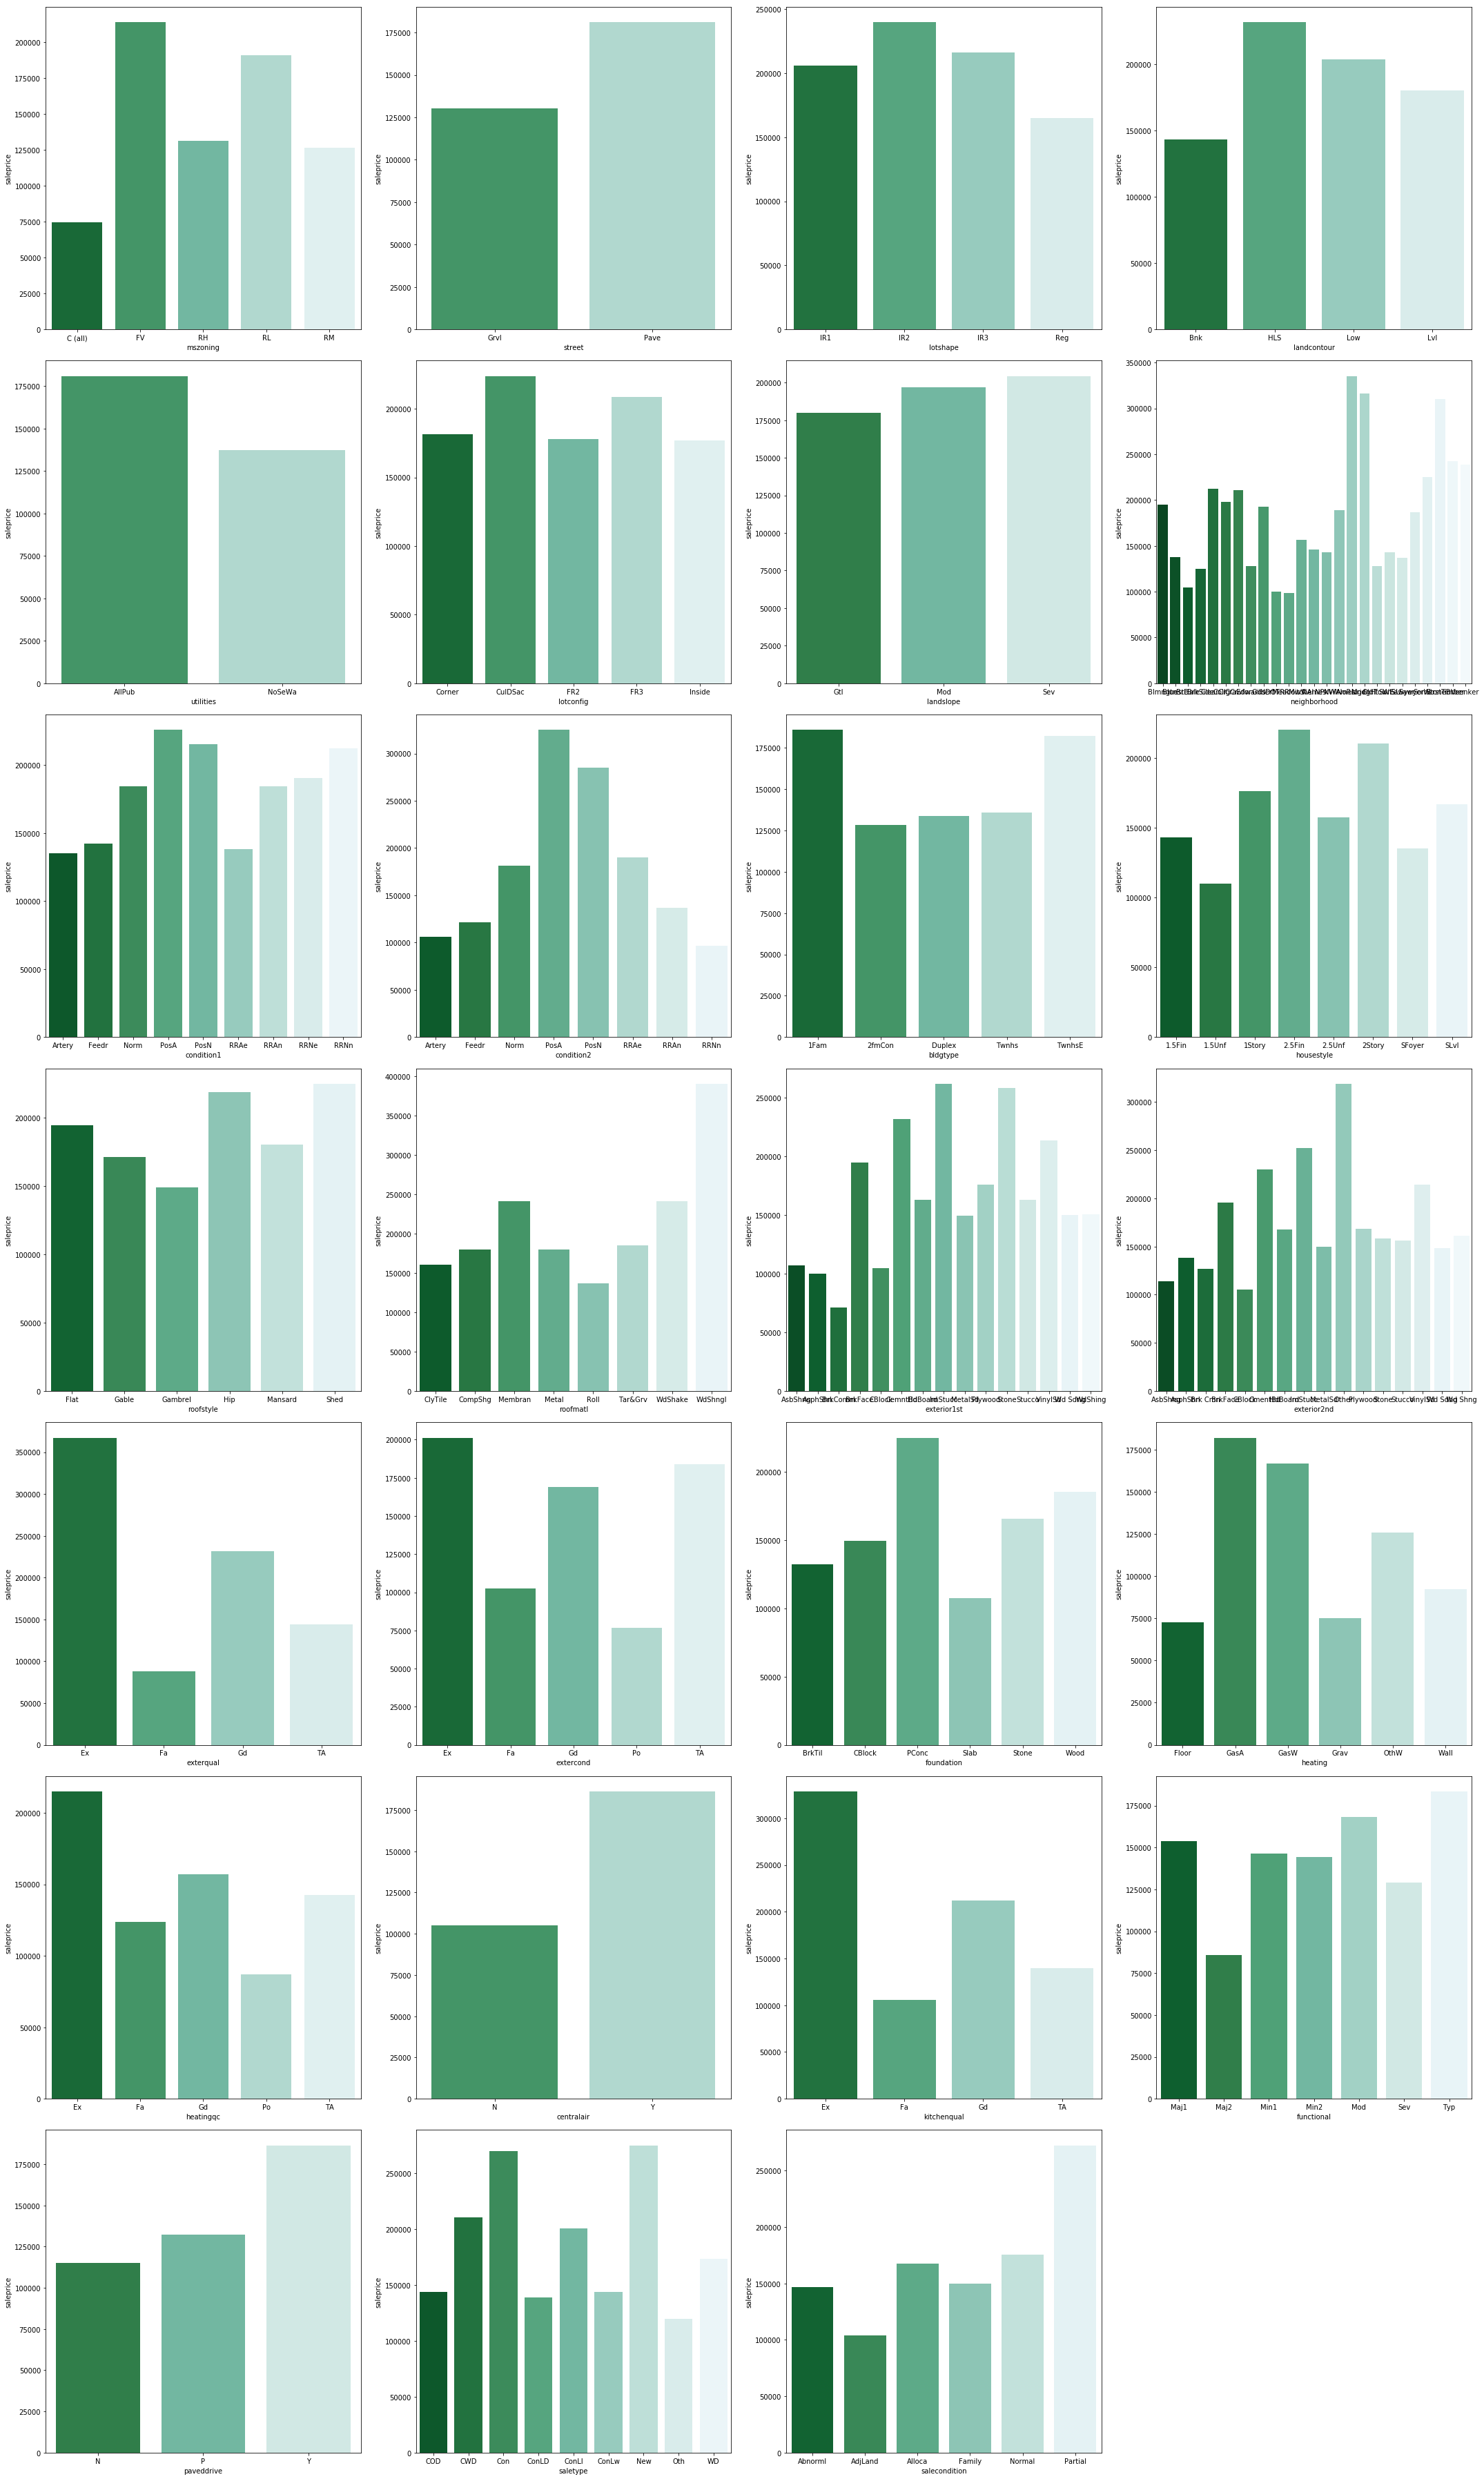

In [14]:
plt.figure(figsize=(30,50))

for i in range(len(nonNumerical_columList)) :
    tmp_df = houseprice_df.groupby(nonNumerical_columList[i])['saleprice'].mean().reset_index()
    plt.subplot(7,4,i+1)
    sns.barplot(x = nonNumerical_columList[i], y='saleprice', data=tmp_df, palette='BuGn_r')
plt.tight_layout()
plt.show()

In [15]:
houseprice_df.head()

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
house_add_df = pd.concat([houseprice_df, pd.get_dummies(houseprice_df['mszoning'], prefix="mszoning", drop_first=True)], axis = 1)
house_add_df = pd.concat([house_add_df,pd.get_dummies(houseprice_df['street'], prefix="street", drop_first=True)], axis=1)
house_add_df = pd.concat([house_add_df,pd.get_dummies(houseprice_df['kitchenqual'], prefix="kitchenqual", drop_first=True)], axis=1)
house_add_df = pd.concat([house_add_df,pd.get_dummies(houseprice_df['centralair'], prefix="centralair", drop_first=True)], axis=1)
house_add_df = pd.concat([house_add_df,pd.get_dummies(houseprice_df['heating'], prefix="heating", drop_first=True)], axis=1)

In [26]:
house_add_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotarea', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation',
       'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagecars', 'garagearea', 'paveddrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch',
       'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saletype',
       'salecondition', 'saleprice', 'mszoning_FV', 'mszoning_RH',
       'mszoning_RL', 'mszoning_

In [38]:
dummyList = ['mszoning_FV', 'mszoning_RH',
       'mszoning_RL', 'mszoning_RM', 'street_Pave', 'kitchenqual_Fa',
       'kitchenqual_Gd', 'kitchenqual_TA', 'centralair_Y', 'heating_GasA',
       'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall']

In [40]:
X = house_add_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummyList]
Y = house_add_df.saleprice

In [42]:
# We need to manually add a constant
# in statsmodels' sm

import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     293.9
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:06:32   Log-Likelihood:                -17387.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1440   BIC:                         3.492e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9041.7709   4.07e+04      0.222      0.824   -7.08e+04    8.89e+04
overallqual     1.788e+04   1161.568     15.395      0.000    1.56e+04    2.02e+04
grlivarea         45.5962      2.362     19.301      0.000      40.962      50.230
garagecars      1.407e+04   2852.273      4.932      0.000    8471.582    1.97e+04
garagearea         7.4917      9.868      0.759      0.448     -11.865      26.849
totalbsmtsf       23.5698      2.820      8.357      0.000      18.037      29.102
mszoning_FV     2.592e+04   1.31e+04      1.973      0.049     155.474    5.17e+04
mszoning_RH     1.758e+04    1.5e+04      1.171      0.242   -1.19e+04    4.71e+04
mszoning_RL     2.882e+04   1.22e+04      2.358      0.019    4844.339    5.28e+04
mszoning_RM     1.055e+04   1.23e+04      0.857      0.392   -1.36e+04    3.47e+04
street_Pave    -5414.0257   1.54e+04     -0.351      0.726   -3.57e+04    2.49e+04
kitchenqual_Fa  -5.61e+04   8088.378     -6.936      0.000    -7.2e+04   -4.02e+04
kitchenqual_Gd -4.978e+04   4256.932    -11.693      0.000   -5.81e+04   -4.14e+04
kitchenqual_TA -6.264e+04   4834.832    -12.955      0.000   -7.21e+04   -5.32e+04
centralair_Y    1.002e+04   4748.596      2.111      0.035     708.397    1.93e+04
heating_GasA   -3.621e+04   3.66e+04     -0.989      0.323   -1.08e+05    3.56e+04
heating_GasW   -4.004e+04   3.75e+04     -1.069      0.285   -1.14e+05    3.35e+04
heating_Grav   -2.958e+04    3.9e+04     -0.759      0.448   -1.06e+05    4.69e+04
heating_OthW   -8.392e+04   4.47e+04     -1.877      0.061   -1.72e+05    3778.526
heating_Wall   -2.064e+04   4.05e+04     -0.509      0.611      -1e+05    5.88e+04
==============================================================================
Omnibus:                      518.516   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60185.070
Skew:                          -0.607   Prob(JB):                         0.00
Kurtosis:                      34.430   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""